In [14]:
%matplotlib inline

In [15]:
import matplotlib.pyplot as plt
import obspy
import os
import glob
import numpy as np
from matplotlib.dates import YearLocator, MonthLocator, DayLocator, HourLocator, MinuteLocator, SecondLocator, DateFormatter
import matplotlib.dates as mdates
import matplotlib as mpl
import datetime
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

# Colotando os arquivos SOH para um dada estação:

In [16]:
stations = ['BPPF', 'BUCO', 'GENI', 'GRJU', 'PRDT', 'STSN', 'STSR', 'TRSN']

In [17]:
%time

#Pasta com os arquivos SOH
soh_files_folder = '/home/diogo/dados_doutorado/parnaiba_basin/assessing_data/soh_files/'

data_lst = []
datalstS = []
for root, dirs, files in os.walk(soh_files_folder):
    for datafile in files:
        if datafile.endswith('.miniseed'):
            data_lst.append(os.path.join(root, datafile))    
datalstS = sorted(data_lst)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs


In [18]:
BPPF_files = []
BUCO_files = []
GENI_files = []
GRJU_files = []
PRDT_files = []
STSN_files = []
STSR_files = []
TRZN_files = []

In [19]:
for k,j in enumerate(datalstS):
            if 'BPPF'  in j:
                BPPF_files.append(j)
            elif 'BUCO' in j:
                BUCO_files.append(j)
            elif 'GENI' in j:
                GENI_files.append(j)
            elif 'GRJU' in j:
                GRJU_files.append(j)
            elif 'PRDT' in j:
                PRDT_files.append(j)
            elif 'STSN' in j:
                STSN_files.append(j)
            elif 'STSR' in j:
                STSR_files.append(j)
            else:
                TRZN_files.append(j)


In [20]:
sta_files = [BPPF_files,BUCO_files,GENI_files,GRJU_files,PRDT_files,STSN_files,STSR_files,TRZN_files]

In [21]:
dir_names = [[]]*len(sta_files)

for i,j in enumerate(sta_files):
    dir_names[i] = [i.split('/BP.')[0] for i in j]

In [22]:
dir_name = [[]]*len(sta_files)

for i,j in enumerate(dir_names):
    dir_name[i] = sorted(list(set(j)))

In [23]:
%time

soh_files = [[]]*len(dir_name)
soh_n_files = [[]]*len(dir_name)

for i,j in enumerate(dir_name):
    files = [sorted(glob.glob(k+'/*.miniseed'))[-1] for k in j]
    n_files = [len(glob.glob(k+'/*.miniseed')) for k in j]
    soh_files[i] = files
    soh_n_files[i] = n_files

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 3.58 µs


In [24]:
date_sta = [[]]*len(soh_files)

for i,j in enumerate(soh_files):
    channel_lst = [obspy.read(l,headonly=True) for l in j]
    endtime = [x[0].stats.endtime for x in channel_lst]    
    date_sta[i] = endtime

In [25]:
date_lst = [[]]*len(date_sta)
for i,l in enumerate(date_sta):
    date_lista = [datetime.date(j.year,j.month,j.day) for j in l]
    date_lst[i] = date_lista

Text(0.4, 0.9, 'Número de horas registradas por dia')

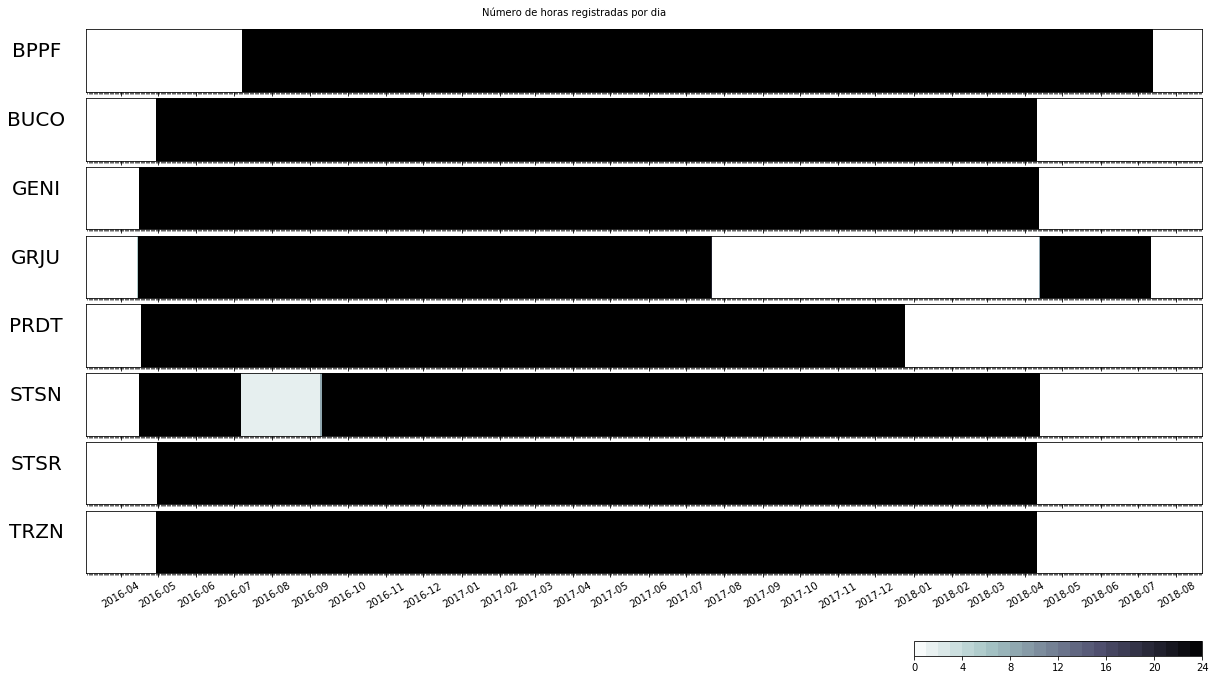

In [26]:
days = DayLocator()   # every year
months = MonthLocator()  # every month
yearsFmt = DateFormatter('%Y-%m')



fig, ax = plt.subplots(nrows=len(date_lst), ncols=1,figsize=(20,10),sharex=True)
plt.subplots_adjust(hspace=.1)

for i,j in enumerate(date_lst):
    x = j
    y = soh_n_files[i]
    maximo = max(y)
    minimo = min(y)
    xlim1 = x[:-1]
    xlim2 = x[1:]
    color_param = [((k - minimo)/(maximo - minimo)) for k in y]

    for k,l in enumerate(xlim1):
        ax[i].axvspan(xmin=l,xmax=xlim2[k],color = plt.cm.bone_r(color_param[k]))
    ax[i].xaxis.set_major_locator(months)
    ax[i].xaxis.set_major_formatter(yearsFmt)
    ax[i].xaxis.set_minor_locator(days)
    ax[i].set_ylim(0,0.5)
    ax[i].set_yticks([])
    ax[i].set_ylabel(stations[i],rotation=0, fontsize=20, labelpad=50)
    plt.setp(ax[i].xaxis.get_majorticklabels(), rotation=30 )


cmap = plt.get_cmap('bone_r')
cax = fig.add_axes([0.7, 0.01, 0.2, 0.02])

norm = mpl.colors.Normalize(vmin=0,vmax=24)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm,cax=cax,ticks=np.linspace(0,24,7),boundaries=np.arange(0,25,1),orientation='horizontal')
fig.text(0.4,0.9,'Número de horas registradas por dia')

## Importando as datas das coletas das estações

In [27]:
dias_coleta = np.loadtxt('/home/diogo/dados_doutorado/parnaiba_basin/assessing_data/soh_files/dias_coleta.txt',dtype=str)

In [28]:
BPPF_coleta = []
BUCO_coleta = []
GENI_coleta = []
GRJU_coleta = []
PRDT_coleta = []
STSN_coleta = []
STSR_coleta = []
TRZN_coleta = []

for k,j in enumerate(dias_coleta):
            if 'BPPF'  in j:
                BPPF_coleta.append(j[5:])
            elif 'BUCO' in j:
                BUCO_coleta.append(j[5:])
            elif 'GENI' in j:
                GENI_coleta.append(j[5:])
            elif 'GRJU' in j:
                GRJU_coleta.append(j[5:])
            elif 'PRDT' in j:
                PRDT_coleta.append(j[5:])
            elif 'STSN' in j:
                STSN_coleta.append(j[5:])
            elif 'STSR' in j:
                STSR_coleta.append(j[5:])
            else:
                TRZN_coleta.append(j[5:])

In [29]:
sta_coleta = [BPPF_coleta,BUCO_coleta,GENI_coleta,GRJU_coleta,PRDT_coleta,STSN_coleta,STSR_coleta,TRZN_coleta]

In [30]:
date_coleta = [[]]*len(sta_coleta)
for i,j in enumerate(sta_coleta):
    coleta_lista = [datetime.date(int(k[0:4]),int(k[5:7]),int(k[8:10])) for k in j]
    date_coleta[i] = coleta_lista

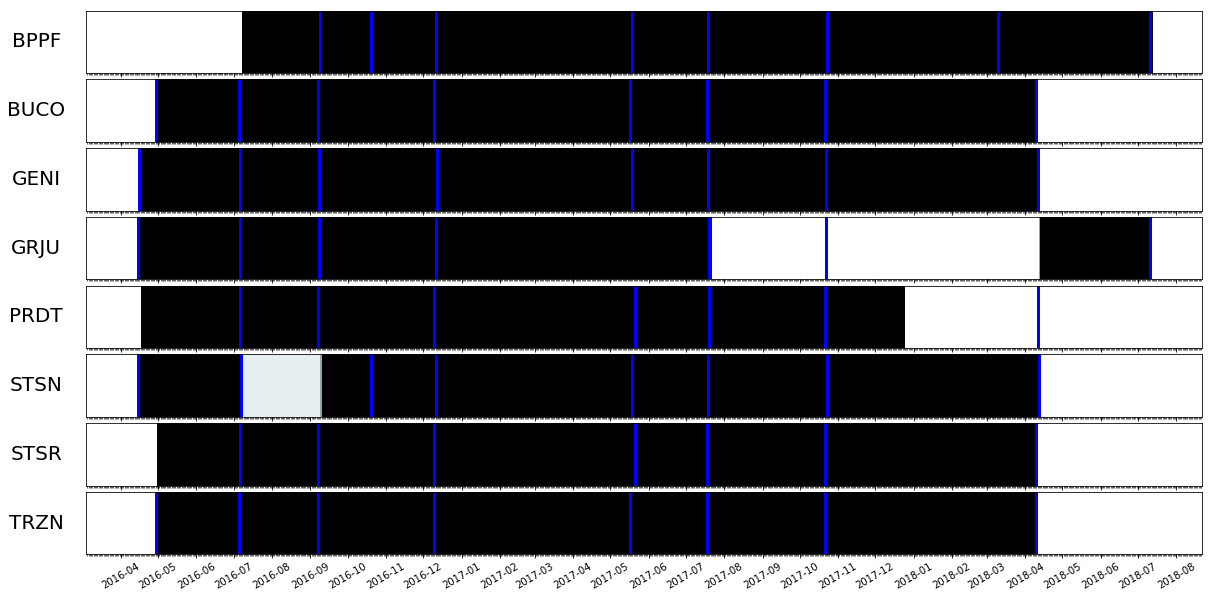

In [33]:
days = DayLocator()   # every year
months = MonthLocator()  # every month
yearsFmt = DateFormatter('%Y-%m')


fig, ax = plt.subplots(nrows=len(date_lst), ncols=1,figsize=(20,10),sharex=True)
plt.subplots_adjust(hspace=.1)

for i,j in enumerate(date_lst):
    x = j
    y = soh_n_files[i]
    maximo = max(y)
    minimo = min(y)
    xlim1 = x[:-1]
    xlim2 = x[1:]
    color_param = [((k - minimo)/(maximo - minimo)) for k in y]

    for k,l in enumerate(xlim1):
        ax[i].axvspan(xmin=l,xmax=xlim2[k],color = plt.cm.bone_r(color_param[k]))
    [ax[i].axvline(k,color='b', linestyle='-',lw=3) for k in date_coleta[i]]
    ax[i].xaxis.set_major_locator(months)
    ax[i].xaxis.set_major_formatter(yearsFmt)
    ax[i].xaxis.set_minor_locator(days)
    ax[i].set_ylim(0,0.5)
    #ax[i].set_xlim(datetime.date(2016,4,1),datetime.date(2017,11,1))
    ax[i].set_yticks([])
    ax[i].set_ylabel(stations[i],rotation=0, fontsize=20, labelpad=50, horizontalalignment='center',verticalalignment='center')
    plt.setp(ax[i].xaxis.get_majorticklabels(), rotation=30)


#cmap = plt.get_cmap('bone_r')
#cax = fig.add_axes([0.7, 0.027, 0.2, 0.02])

#norm = mpl.colors.Normalize(vmin=0,vmax=24)
#sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
#sm.set_array([])
#cbar = plt.colorbar(sm,cax=cax,ticks=np.linspace(0,24,7),boundaries=np.arange(0,25,1),orientation='horizontal')
#cbar.ax.set_title('Número de arquivos por dia')

#fig.text(0.2,0.9,'Número de arquivos por dia e datas das coletas de dados',fontsize=25)
fig.savefig(soh_files_folder+'data_sta_dia.png',dpi=300)